In [ ]:
from datasets import *
from debugging import *
from analytics import *
from augmentations import *
from models import *

import keras_cv
import keras
import tensorflow as tf

2025-08-03 16:55:42.361466: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


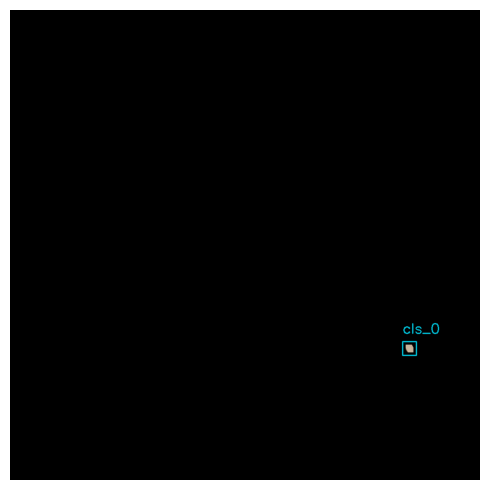

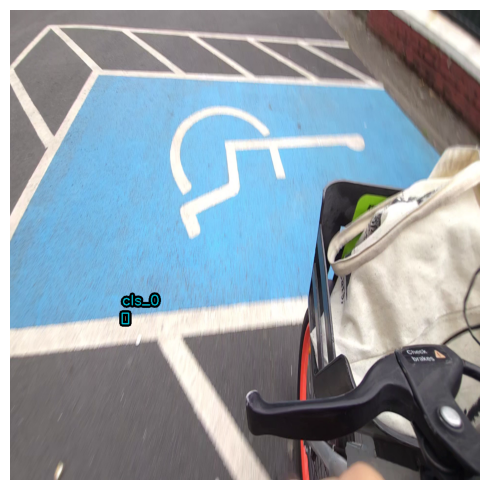

In [3]:
dss = coin_ds('./datasets/synthetic/annotations.xml', d_img=False, d_bb=False)
ds090 = coin_ds('./datasets/090/annotations.xml', 'PNG', d_img=False, d_bb=False)

visualise_sample(dss.take(1))
visualise_sample(ds090.take(1))

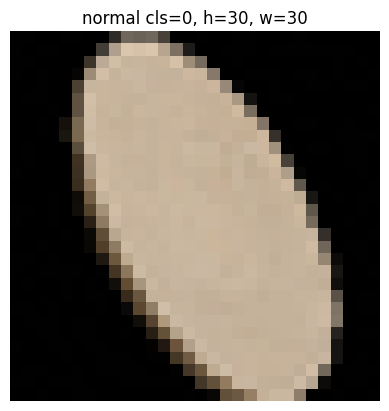

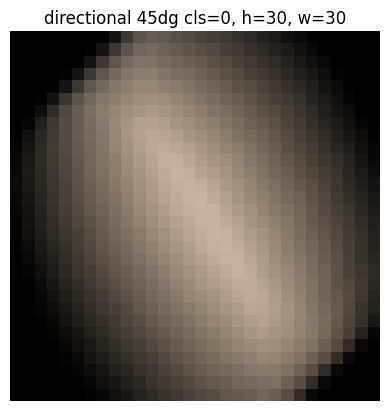

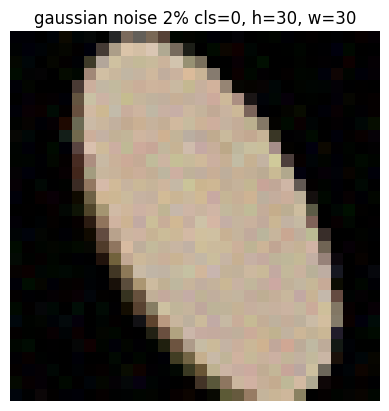

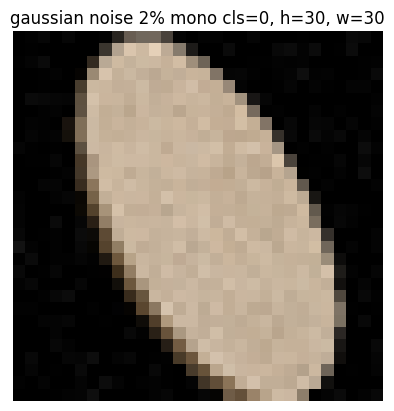

2025-08-03 16:56:10.209463: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


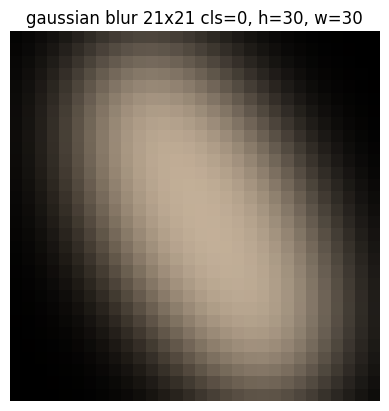

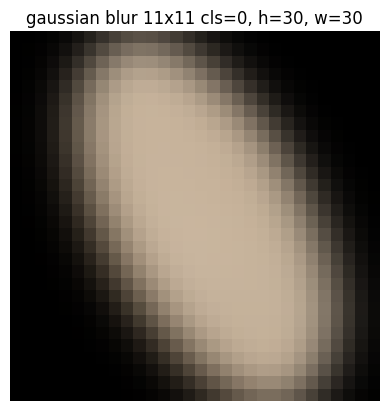

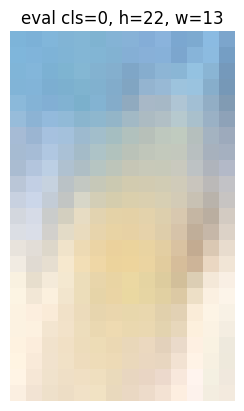

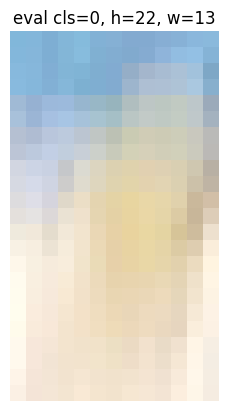

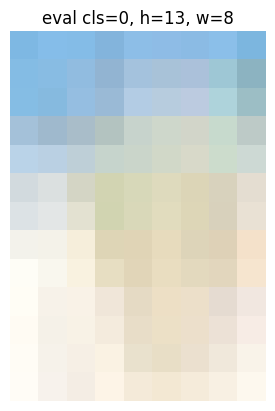

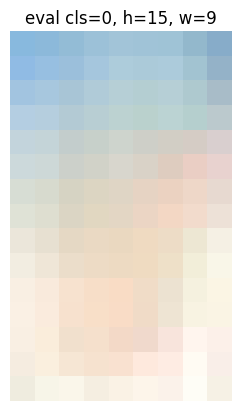

In [4]:
visualise_sample_bboxes(dss.take(1), "normal")
visualise_sample_bboxes(dss.map(apply_directional_blur(45, 15)).take(1), "directional 45dg")
visualise_sample_bboxes(dss.map(apply_gaussian_noise(stddev=0.02)).take(1), "gaussian noise 2%")
visualise_sample_bboxes(dss.map(apply_gaussian_noise(stddev=0.02, monochromatic=True)).take(1),
                        "gaussian noise 2% mono")
visualise_sample_bboxes(dss.map(apply_gaussian_blur(21)).take(1), "gaussian blur 21x21")
visualise_sample_bboxes(dss.map(apply_gaussian_blur(11)).take(1), "gaussian blur 11x11")
visualise_sample_bboxes(ds090.take(4), "eval")

In [5]:
from collections import Counter
import pandas as pd

print('190:')
ar1 = metrics(coin_ds('./datasets/090/annotations.xml', 'PNG', d_img=False, d_bb=False))
print('090:')
ar2 = metrics(coin_ds('./datasets/190/annotations.xml', 'PNG', d_img=False, d_bb=False))
print('synthetic:')
ar3 = metrics(coin_ds('./datasets/synthetic/annotations.xml', d_img=False, d_bb=False))

print("Top 5 aspect ratio 190 and 090:")
for frac, count in Counter(pd.concat([ar1, ar2], ignore_index=True)).most_common(5):
    print(f"{frac.numerator}:{frac.denominator} - {count} times")

190:
          bbox_width    bbox_height  aspect_ratio
count      21.000000      21.000000     21.000000
mean  -257088.333333 -590231.761905      0.520661
std     68031.648024  198613.413155      0.275144
min   -339918.000000 -997603.000000      0.122573
25%   -318231.000000 -724468.000000      0.287129
50%   -273317.000000 -548113.000000      0.498651
75%   -208016.000000 -423158.000000      0.752038
max   -122279.000000 -343398.000000      0.968828
Mean aspect ratio:1:2
090:
          bbox_width    bbox_height  aspect_ratio
count      31.000000      31.000000     31.000000
mean  -419736.516129 -404981.645161      1.780258
std     79299.085142  258052.417333      1.433487
min   -513196.000000 -982787.000000      0.250930
25%   -489160.500000 -578983.000000      0.635439
50%   -434547.000000 -341175.000000      1.273678
75%   -367312.500000 -190219.000000      2.568816
max   -246611.000000  -95925.000000      5.349971
Mean aspect ratio:16:9
synthetic:
          bbox_width   bbox_height